In [2]:
import polars as ps

pokémon = ps.read_csv("./pokémon/Pokemon.csv")
pokémon

shape: (800, 13)
┌─────┬───────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ null   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 719 ┆ Diancie               ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 719 ┆ DiancieMega Diancie   ┆ Rock    ┆ Fairy  ┆ … ┆ 110     ┆ 110   ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined   ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound    ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion             ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴───────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [3]:
pokémon.sort(ps.col("HP")).tail(1)

shape: (1, 13)
┌─────┬─────────┬────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name    ┆ Type 1 ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str     ┆ str    ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═════════╪════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 242 ┆ Blissey ┆ Normal ┆ null   ┆ … ┆ 135     ┆ 55    ┆ 2          ┆ false     │
└─────┴─────────┴────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [4]:
from polars import col

pokémon.select(ps.col("Type 2").fill_null(ps.col("Type 1")))
pnn = pokémon.with_columns([
    ps.when(col("Type 2").is_null()).then(col("Type 1")).otherwise(col("Type 2")).alias("Type 2")
])

pnn

shape: (800, 13)
┌─────┬───────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ Fire   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 719 ┆ Diancie               ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 719 ┆ DiancieMega Diancie   ┆ Rock    ┆ Fairy  ┆ … ┆ 110     ┆ 110   ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined   ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound    ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion             ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴───────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [5]:
gen1 = pnn.filter(col("Generation") == 1)
gen1

shape: (166, 13)
┌─────┬───────────────────────┬─────────┬──────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2   ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---      ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str      ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪══════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison   ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison   ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison   ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison   ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ Fire     ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …        ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 149 ┆ Dragonite             ┆ Dragon  ┆ Flying   ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 150 ┆ Mewtwo                ┆ Psychic ┆ Psychic  ┆ … ┆ 90      ┆ 130   ┆ 1          ┆ true      │
│ 150 ┆ MewtwoMega Mewtwo X   ┆ Psychic ┆ Fighting ┆ … ┆ 100     ┆ 130   ┆ 1          ┆ true      │
│ 150 ┆ MewtwoMega Mewtwo Y   ┆ Psychic ┆ Psychic  ┆ … ┆ 120     ┆ 140   ┆ 1          ┆ true      │
│ 151 ┆ Mew                   ┆ Psychic ┆ Psychic  ┆ … ┆ 100     ┆ 100   ┆ 1          ┆ false     │
└─────┴───────────────────────┴─────────┴──────────┴───┴─────────┴───────┴────────────┴───────────┘

In [6]:
no_megas = pnn.filter(~col("Name").str.contains("Mega "))
no_megas

shape: (752, 13)
┌─────┬─────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                 ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                 ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur           ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur             ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur            ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander          ┆ Fire    ┆ Fire   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ 5   ┆ Charmeleon          ┆ Fire    ┆ Fire   ┆ … ┆ 65      ┆ 80    ┆ 1          ┆ false     │
│ …   ┆ …                   ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 718 ┆ Zygarde50% Forme    ┆ Dragon  ┆ Ground ┆ … ┆ 95      ┆ 95    ┆ 6          ┆ true      │
│ 719 ┆ Diancie             ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound  ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion           ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴─────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

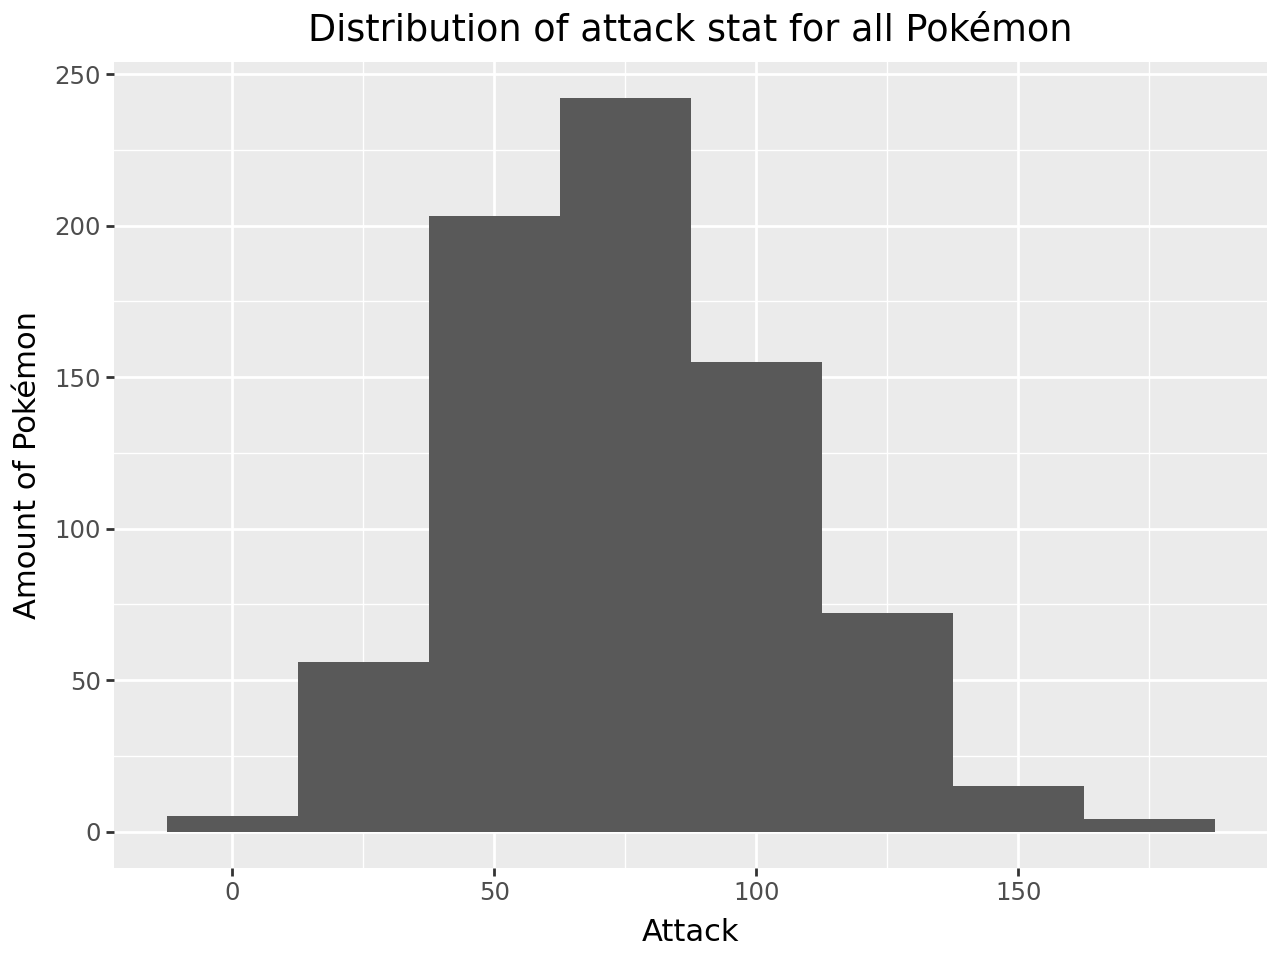

In [7]:
from plotnine import ggplot, aes, geom_histogram, labs

(
    ggplot(no_megas.to_pandas())
    + aes(x="Attack") 
    + geom_histogram(bins=(200/25))
    + labs(title="Distribution of attack stat for all Pokémon", y="Amount of Pokémon")
)


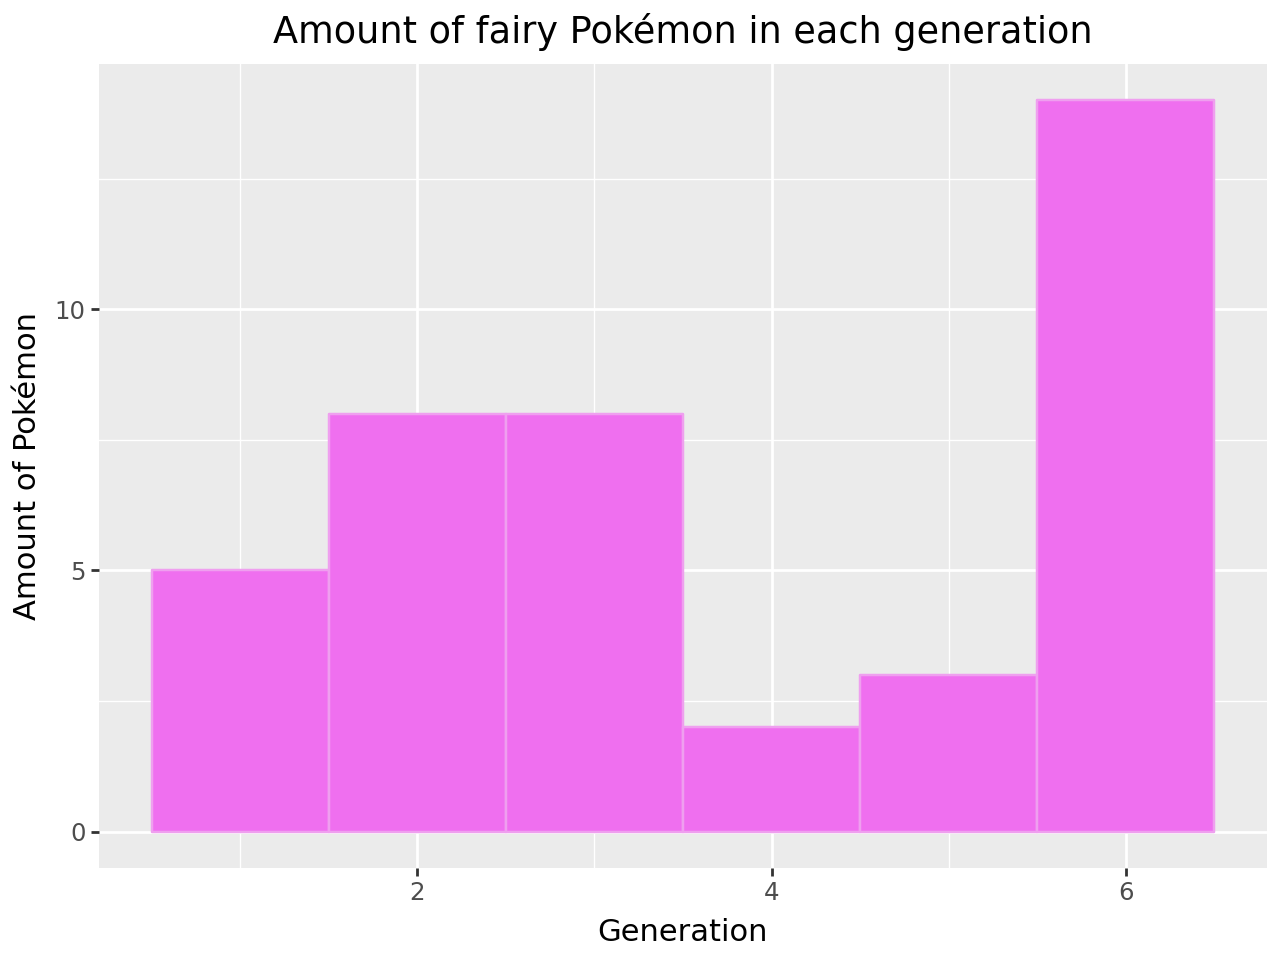

In [8]:
only_fairy = pnn.filter(col("Type 1").str.contains("Fairy") | col("Type 2").str.contains("Fairy"))

(
    ggplot(only_fairy.to_pandas())
    + aes(x="Generation") 
    + geom_histogram(bins=(6), color='#EF9FEF', fill='#EF6FEF')
    + labs(title="Amount of fairy Pokémon in each generation", y="Amount of Pokémon")
)

In [22]:
types = pokémon.select(["Type 1"]).unique().to_series().to_list()

In [25]:
pokétype = ps.read_csv("./pokémon/Pokemon Type Chart.csv")
pokétype

shape: (18, 19)
┌──────────┬────────┬──────┬───────┬───┬────────┬──────┬───────┬───────┐
│          ┆ Normal ┆ Fire ┆ Water ┆ … ┆ Dragon ┆ Dark ┆ Steel ┆ Fairy │
│ ---      ┆ ---    ┆ ---  ┆ ---   ┆   ┆ ---    ┆ ---  ┆ ---   ┆ ---   │
│ str      ┆ f64    ┆ f64  ┆ f64   ┆   ┆ f64    ┆ f64  ┆ f64   ┆ f64   │
╞══════════╪════════╪══════╪═══════╪═══╪════════╪══════╪═══════╪═══════╡
│ Normal   ┆ 1.0    ┆ 1.0  ┆ 1.0   ┆ … ┆ 1.0    ┆ 1.0  ┆ 0.5   ┆ 1.0   │
│ Fire     ┆ 1.0    ┆ 0.5  ┆ 0.5   ┆ … ┆ 0.5    ┆ 1.0  ┆ 2.0   ┆ 1.0   │
│ Water    ┆ 1.0    ┆ 2.0  ┆ 0.5   ┆ … ┆ 0.5    ┆ 1.0  ┆ 1.0   ┆ 1.0   │
│ Electric ┆ 1.0    ┆ 1.0  ┆ 2.0   ┆ … ┆ 0.5    ┆ 1.0  ┆ 1.0   ┆ 1.0   │
│ Grass    ┆ 1.0    ┆ 0.5  ┆ 2.0   ┆ … ┆ 0.5    ┆ 1.0  ┆ 0.5   ┆ 1.0   │
│ …        ┆ …      ┆ …    ┆ …     ┆ … ┆ …      ┆ …    ┆ …     ┆ …     │
│ Ghost    ┆ 0.0    ┆ 1.0  ┆ 1.0   ┆ … ┆ 1.0    ┆ 0.5  ┆ 1.0   ┆ 1.0   │
│ Dragon   ┆ 1.0    ┆ 1.0  ┆ 1.0   ┆ … ┆ 2.0    ┆ 1.0  ┆ 0.5   ┆ 0.0   │
│ Dark     ┆ 1.0    ┆ 1.0  ┆ 1.0   ┆ … ┆ 1.0    ┆ 0.5  ┆ 1.0   ┆ 0.5   │
│ Steel    ┆ 1.0    ┆ 0.5  ┆ 0.5   ┆ … ┆ 1.0    ┆ 1.0  ┆ 0.5   ┆ 2.0   │
│ Fairy    ┆ 1.0    ┆ 0.5  ┆ 1.0   ┆ … ┆ 2.0    ┆ 2.0  ┆ 0.5   ┆ 1.0   │
└──────────┴────────┴──────┴───────┴───┴────────┴──────┴───────┴───────┘

In [255]:
from dataclasses import dataclass
from enum import Enum
from typing import TypeVar
import random

TPokémon = TypeVar("TPokémon", bound="Pokémon")

pokémon_list: list = []

class Effective(Enum):
    """
    Enum Description: 
    """
    SUPER = "It's super effective!"
    NORMAL = ""
    NOTVERY = "It's not very effective..."
    NOT = "But it has no effect!"


@dataclass
class Pokémon:
    name: str
    types: list
    hp: int
    curr_hp: int
    attack: int
    defense: int
    sp_atk: int
    sp_def: int

    def attack_opponent(self, opponent: TPokémon, typeatk: str, atkpwr: int):
        if opponent.curr_hp == 0:
            print("You cannot attack a fainted Pokémon!")
            return

        type_modifier = pokétype.filter(pokétype[""].str.contains(typeatk))[opponent.types[0]][0]
        if (opponent.types[1] is not None):
            type_modifier *= pokétype.filter(pokétype[""].str.contains(typeatk))[opponent.types[1]][0]
        
        damage = self.attack * type_modifier * (atkpwr / 100)
        

        if(typeatk in self.types):
            damage = damage * 1.5
        opponent.curr_hp = opponent.curr_hp - damage
        print(f"""{self.name} attacks {opponent.name} for {int(damage)} damage!\n
{Effective.SUPER.value if type_modifier > 1.0 else Effective.NORMAL.value}
{Effective.NOTVERY.value if ((type_modifier < 1.0) and (type_modifier > 0.0))  else Effective.NORMAL.value}
{Effective.NOT.value if type_modifier == 0.0 else Effective.NORMAL.value}""")

        if (opponent.curr_hp <= 0):
            opponent.curr_hp = 0
            print(f"{opponent.name} fainted!")
            return
        print(f"It now has {int(opponent.curr_hp)} HP")

    def heal(self):
        self.curr_hp = self.hp

for row in pokémon.rows(named=True):
    pokémon_list.append(Pokémon(
        name = row["Name"],
        types = [row["Type 1"], row["Type 2"]],
        hp = row["HP"],
        curr_hp = row["HP"],
        attack = row["Attack"],
        defense = row["Defense"],
        sp_atk = row["Sp. Atk"],
        sp_def = row["Sp. Def"],
    ))



In [256]:
pokémon_list[0].attack_opponent(pokémon_list[15], "Grass", 40)

Bulbasaur attacks Butterfree for 16 damage!


It's not very effective...

It now has 167 HP


In [201]:
for poke in pokémon_list:
    poke.heal()